# **Implement multi-resolution image decomposition and reconstruction using wavelet**

In [ ]:
import pywt
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
from pywt._doc_utils import wavedec2_keys, draw_2d_wp_basis

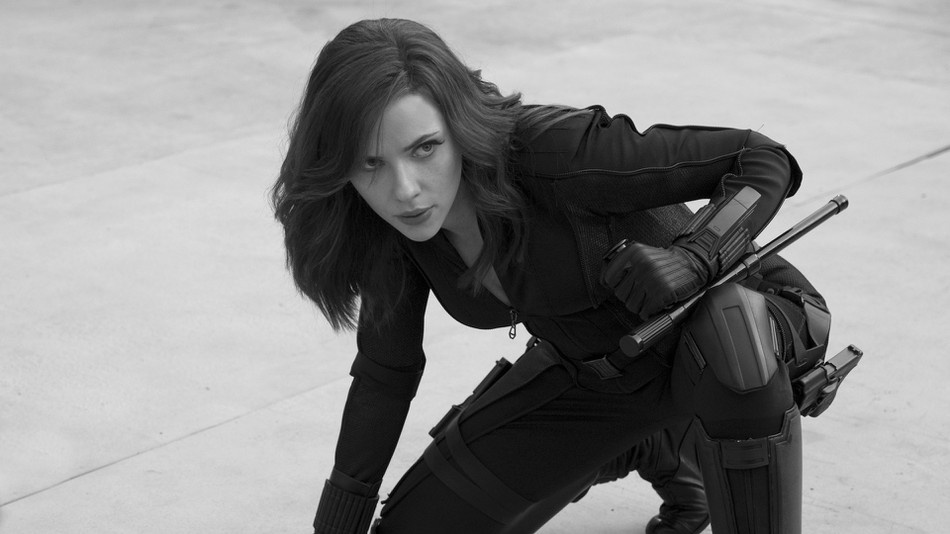

In [ ]:
original = cv2.imread(
    "/content/drive/MyDrive/marvel/train/black widow/pic_028.jpg",0)
cv2_imshow(original)

In [ ]:
def Level_1():
  print("\nLevel 1 Decomposition\n")
  draw_2d_wp_basis(original.shape, wavedec2_keys(1),  label_levels=1 )
  titles = ['Approximation', ' Horizontal detail','Vertical detail',
            'Diagonal detail']
  coeffs = pywt.wavedec2(original, wavelet="db1", level=1)
  CA, (CH, CV, CD) = coeffs
  fig = plt.figure(figsize=(20,20))
  for i, a in enumerate([CA,CH,CV,CD]):
      ax = fig.add_subplot(1, 4, i + 1)
      ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
      ax.set_title(titles[i], fontsize=15)
      ax.set_xticks([])
      ax.set_yticks([])

  fig.tight_layout()
  plt.show()

  rec = pywt.waverec2(coeffs, 'db1')
  print("\nReconstructed Image")
  cv2_imshow(rec.astype("uint8"))
  return coeffs

def Level_2():
  print("\nLevel 2 Decomposition\n")
  draw_2d_wp_basis(original.shape, wavedec2_keys(2),  label_levels=2 )
  titles = ["Approximation", "Approximation-Horizontal Detail",
            "Approximation-Vertical Detail","Approximation-Diagonal Detail",
            ' Horizontal detail','Vertical detail', 'Diagonal detail' ]
  coeffs = pywt.wavedec2(original, "db1", level = 2)
  [CAn,(CHn, CVn, CDn),(CH1,CV1,CD1)] = coeffs
  fig = plt.figure(figsize=(15,15))
  for i, a in enumerate([CAn,CHn, CVn, CDn,CH1,CV1,CD1]):
      ax = fig.add_subplot(3,3,i+1)
      ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
      ax.set_title(titles[i], fontsize=15)

  fig.tight_layout()
  plt.show()

  rec = pywt.waverec2(coeffs, 'db1')
  print("Reconstructed Image")
  cv2_imshow(rec.astype("uint8"))
  return coeffs


def Level_3():
  print("\nLevel 3 Decomposition\n")
  draw_2d_wp_basis(original.shape, wavedec2_keys(3),  label_levels=3)
  titles = ['aaa', 'aah','aav','aad', "Approximation-Horizontal Detail",
            "Approximation-Vertical Detail","Approximation-Diagonal Detail",
            ' Horizontal detail','Vertical detail', 'Diagonal detail' ]
  coeffs = pywt.wavedec2(original, "db1", level = 3)
  [CAn,(CHn, CVn, CDn),(CH1,CV1,CD1), (CH2,CV2,CD2)] = coeffs
  fig = plt.figure(figsize=(15,15))
  for i, a in enumerate([CAn,CHn, CVn, CDn,CH1,CV1,CD1,CH2,CV2,CD2]):
      ax = fig.add_subplot(2,5,i+1)
      ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
      ax.set_title(titles[i], fontsize=10)

  fig.tight_layout()
  plt.show()

  rec = pywt.waverec2(coeffs, 'db1')
  print("Reconstructed Image")
  cv2_imshow(rec.astype("uint8"))
  print()
  return coeffs


Level 1 Decomposition



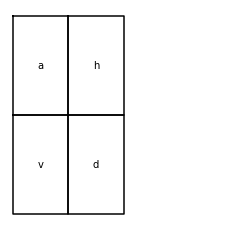

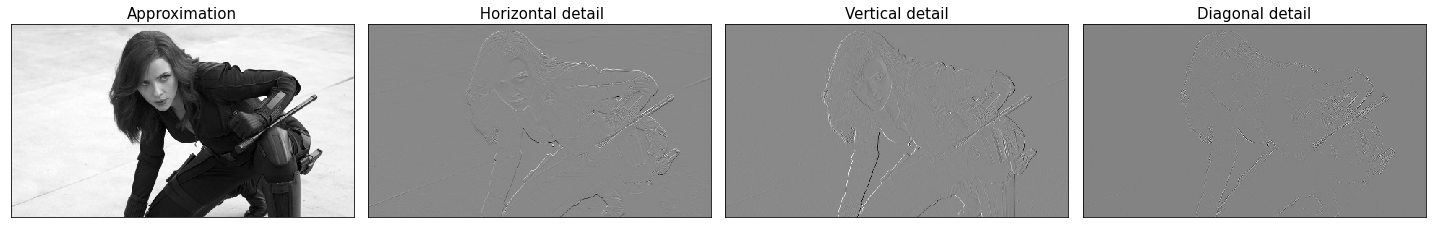


Reconstructed Image


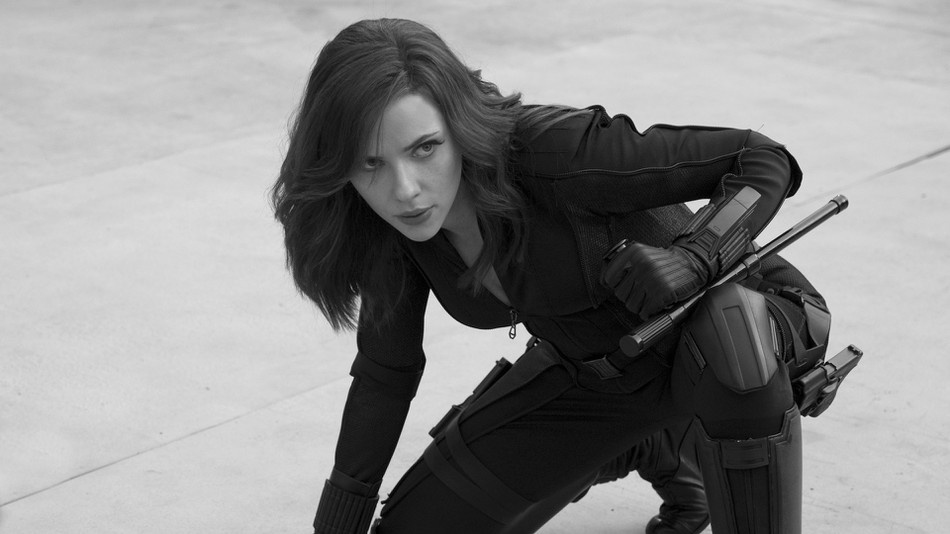


Level 2 Decomposition



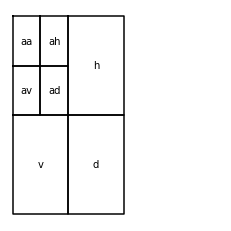

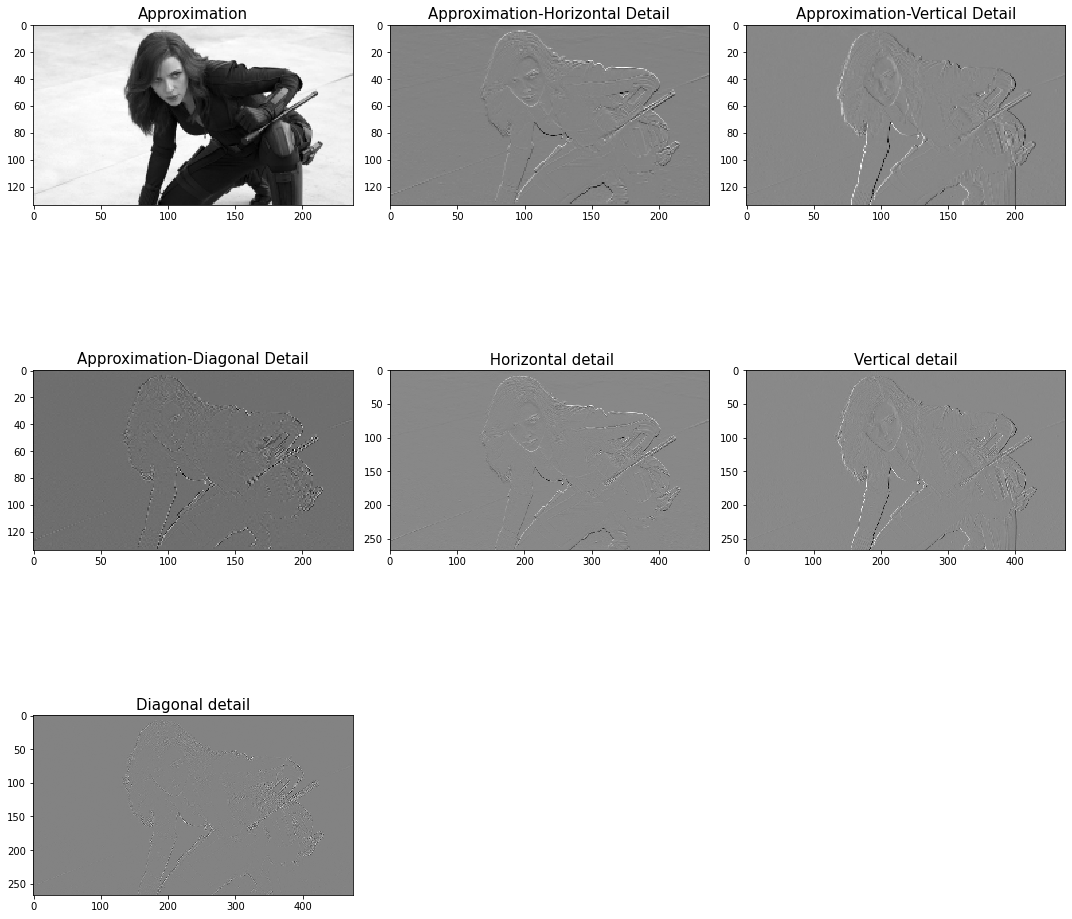

Reconstructed Image


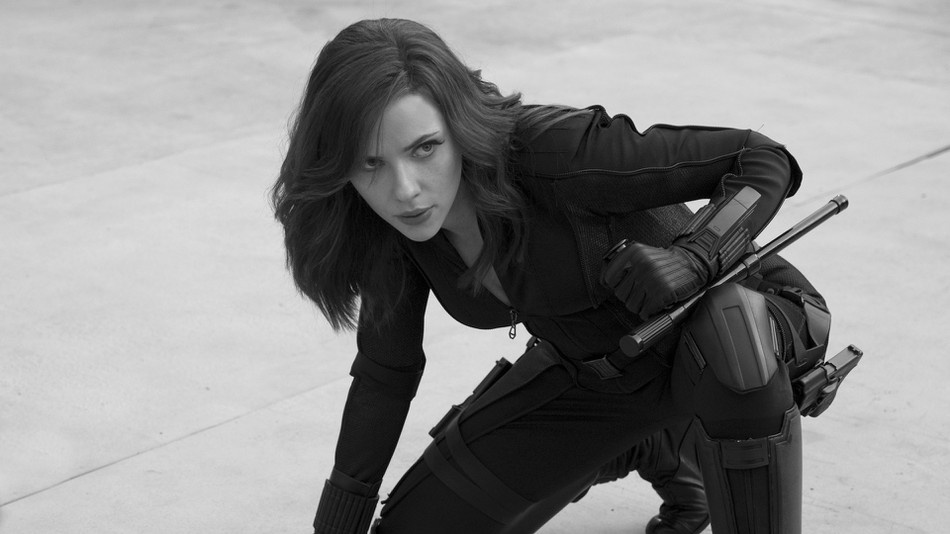


Level 3 Decomposition



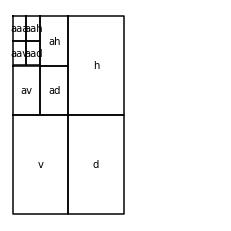

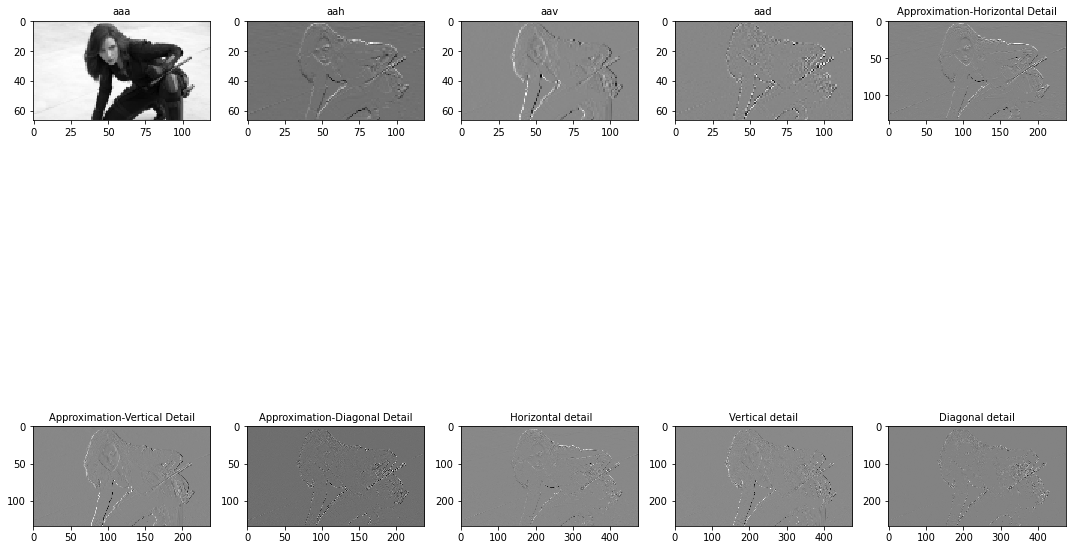

Reconstructed Image


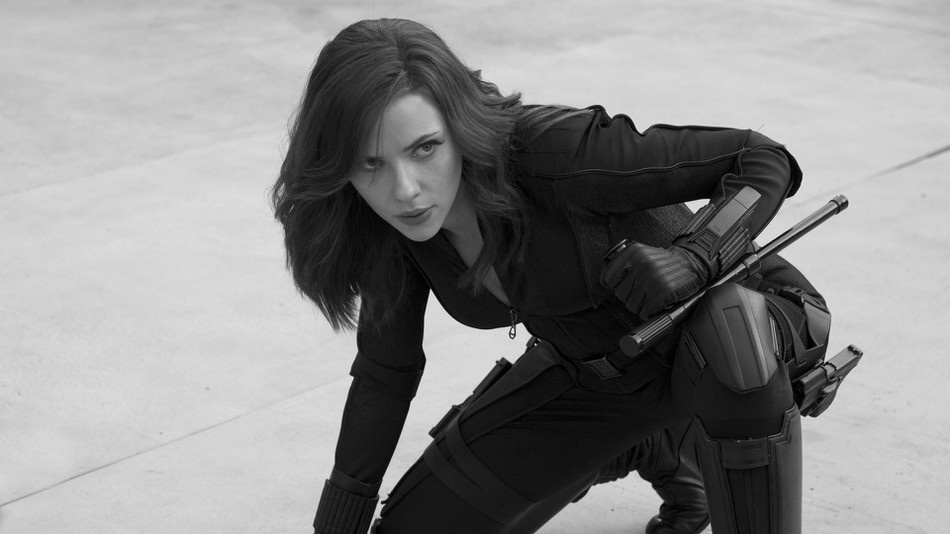

In [ ]:
c1=Level_1()
c2=Level_2()
c3=Level_3()